## Isolation Forest

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import random, os, math
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

In [4]:
# Read the dataset frof file
normal_classes_df = pd.read_csv('normal_classes_df.csv')
anomalous_classes_df = pd.read_csv('outliers_classes_df.csv')

In [5]:
# Removing tag
x = normal_classes_df.drop(['Label'], axis=1)
X_outliers = anomalous_classes_df.drop(['Label'], axis=1)

In [6]:
# Saving Tags 
y = normal_classes_df[['Label']].copy()
y_outliers = anomalous_classes_df[['Label']].copy()

In [7]:
# Bilbing Isolation Forest modul
#clf = IsolationForest(behaviour='new', max_samples=100, random_state=5, contamination="auto")
clf = IsolationForest(behaviour='new', max_samples="auto", random_state=5, contamination="auto")

In [8]:
%%time
# fit the model
clf.fit(x)

Wall time: 21.1 s


IsolationForest(behaviour='new', bootstrap=False, contamination='auto',
        max_features=1.0, max_samples='auto', n_estimators=100,
        n_jobs=None, random_state=5, verbose=0)

In [9]:
%%time
# predict
y_pred_train = clf.predict(x)
y_pred_outliers = clf.predict(X_outliers)

Wall time: 24 s


In [10]:
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size
print ("n_error_test      :", n_error_train)
print ("n_error_outliers  :", n_error_outliers)

n_error_test      : 2494
n_error_outliers  : 1232


In [11]:
cm = np.array([[0, 0], [0, 0]])

In [12]:
unique, counts = np.unique(y_pred_outliers, return_counts=True)

cm[0] = np.asarray((unique, counts))[1]

In [13]:
unique, counts = np.unique(y_pred_train, return_counts=True)

cm[1] = np.asarray((unique, counts))[1]

In [14]:
cm

array([[  509,  1232],
       [ 2494, 32689]])

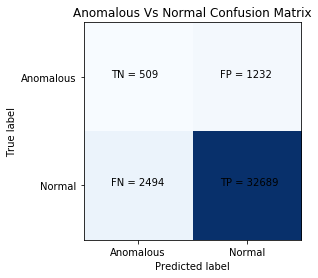

In [15]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Anomalous','Normal']
plt.title('Anomalous Vs Normal Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j-0.25,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [15]:
TP = cm[1][1]
TN = cm[0][0]
FN = cm[1][0]
FP = cm[0][1]

In [16]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Recall = TP/(TP+FN) # Sensitivity
Precision = TP/(TP+FP)
F1 = 2*(Precision*Recall/(Precision+Recall))

In [17]:
print ("Accuracy   :", Accuracy)
print ("Recall     :", Recall)
print ("Precision  :", Precision)
print ("F1-score   :", F1)

Accuracy   : 0.8731719207019825
Recall     : 0.8982178893215473
Precision  : 0.9663038160469667
F1-score   : 0.9310177206239779


In [18]:
# reshape for visualization
X = x.values.reshape(len(x.index), 28, 28)
x_outliers = X_outliers.values.reshape(len(X_outliers.index), 28, 28)

# Normal examples
### Normal prediction good in blue
### Normal prediction error in red

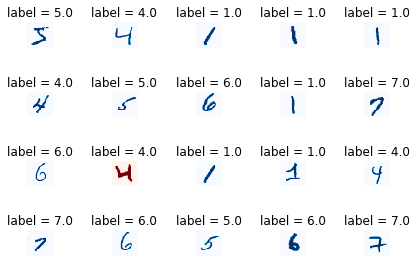

In [19]:
ROW = 4
COLUMN = 5
for i in range(ROW * COLUMN):
    #print (y.iloc[i].values[0])
    # train[i][0] is i-th image data with size 28x28
    image = X[i].reshape(28, 28)   # not necessary to reshape if ndim is set to 2
    plt.subplot(ROW, COLUMN, i+1)          # subplot with size (width 3, height 5)
    if y_pred_train[i] == -1:
        plt.imshow(image, cmap='Reds')  # cmap='gray' is for black and white picture.
    else:    
        plt.imshow(image, cmap='Blues')  # cmap='gray' is for black and white picture.
    # train[i][1] is i-th digit label
    plt.title('label = {}'.format(y.iloc[i].values[0]))
    #plt.title('label = {}'.format(y_pred_train[i]))
    plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
#plt.savefig('mnist_plot.png')
plt.show()

# Outliers examples 
### Outliers prediction good in blue
### Outliers prediction error in red

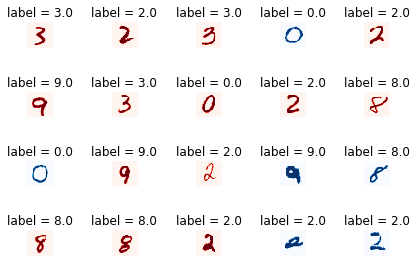

In [20]:
ROW = 4
COLUMN = 5
for i in range(ROW * COLUMN):
    image = x_outliers[i].reshape(28, 28)   # not necessary to reshape if ndim is set to 2
    plt.subplot(ROW, COLUMN, i+1)          # subplot with size (width 3, height 5)
    if y_pred_outliers[i] == 1:
        plt.imshow(image, cmap='Reds')  # cmap='gray' is for Red and white picture.
        plt.title('label = {}'.format(y_outliers.iloc[i].values[0]))
    else:    
        plt.imshow(image, cmap='Blues')  # cmap='Blues' is for Blue and white picture.
        plt.title('label = {}'.format(y_outliers.iloc[i].values[0]))
    plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()